In [1]:
!pip install sktime --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/annual-co2-emissions-per-country.csv')

In [3]:
df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:

#remove all the values from the dataset leaving india entity
df = df[df['Entity'] == 'India']

In [6]:
df

,Entity,Code,Year,Annual CO₂ emissions
13177,India,IND,1858,3.944880e+05
13178,India,IND,1859,6.364850e+05
13179,India,IND,1860,6.431150e+05
13180,India,IND,1861,4.972540e+05
13181,India,IND,1862,5.502940e+05
...,...,...,...,...
13326,India,IND,2018,2.593058e+09
13327,India,IND,2019,2.612888e+09
13328,India,IND,2020,2.421552e+09
13329,India,IND,2021,2.674222e+09


In [7]:
df.drop(columns=['Code','Entity'], inplace=True)

In [8]:

df

,Year,Annual CO₂ emissions
13177,1858,3.944880e+05
13178,1859,6.364850e+05
13179,1860,6.431150e+05
13180,1861,4.972540e+05
13181,1862,5.502940e+05
...,...,...
13326,2018,2.593058e+09
13327,2019,2.612888e+09
13328,2020,2.421552e+09
13329,2021,2.674222e+09


In [9]:
#set index of pd as time
df.set_index('Year', inplace=True)


In [10]:
df.sort_index(inplace=True)

In [12]:
df.head()

,Annual CO₂ emissions
Year,
1858,394488.0
1859,636485.0
1860,643115.0
1861,497254.0
1862,550294.0


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Annual CO₂ emissions'>)

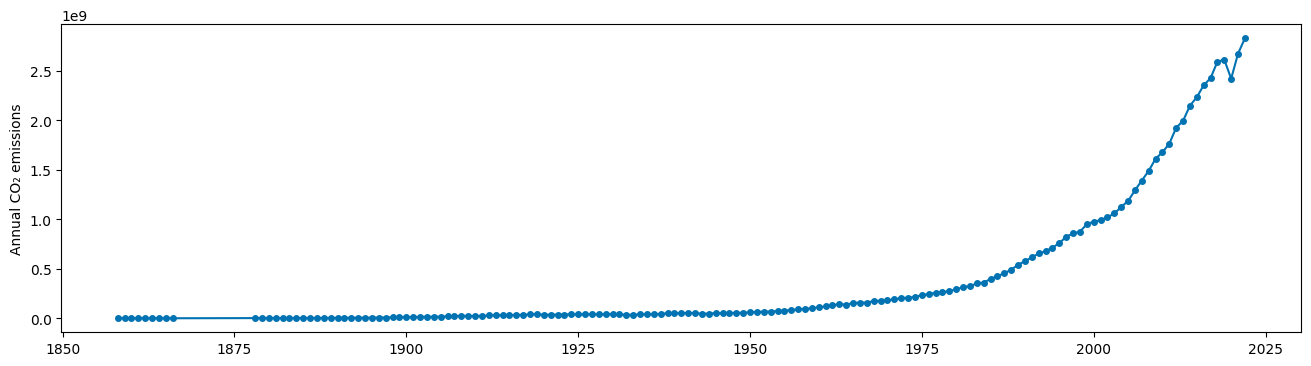

In [14]:
from sktime.utils.plotting import plot_series
plot_series(df)

In [15]:
from sktime.split import temporal_train_test_split
y_train, y_test = temporal_train_test_split(df, test_size=36)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Annual CO₂ emissions'>)

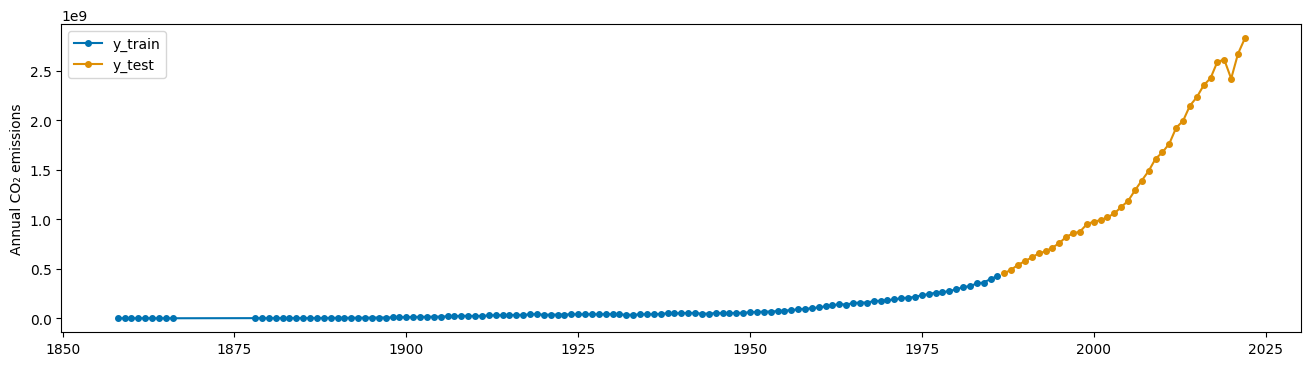

In [16]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [17]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.ets import AutoETS


# Temporarily reset the index for training
y_train_reset = y_train.reset_index(drop=True)

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

# Fit the model
forecaster.fit(y_train_reset)

# Create the forecasting horizon using the original date index from y_test
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Generate predictions
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))

# Restore the date index to y_pred
y_pred.index = y_test.index


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Annual CO₂ emissions'>)

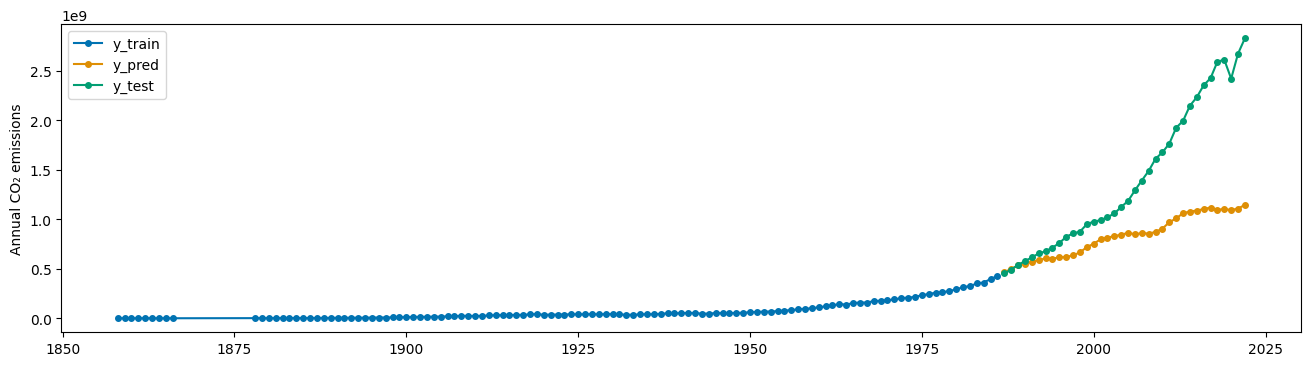

In [18]:
plot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred","y_test"]) # Pass the y_train DataFrame instead of the 'pd' module